# Example Jupyter notebook 

This Jupyter/IPython notebook demonstrates the use of PmagPy functions within a notebook environment. The benefits of working within these notebooks include but are not limited to scientific reproducibility; coherent code development; convenient workspace for projects; version control (when integrated with GitHub or other version control software).

Note: this notebook makes heavy use of the pandas Dataframe

In [1]:
import sys
from io import StringIO
#change to match where the PmagPy folder is on your computer
#sys.path.insert(0, '/Users/Laurentia/PmagPy')
#sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/PmagPy/')
# USING FAIRCHILD FORK OF PMAGPY -- CONTINUAL PULL REQUESTS ARE MADE TO PMAGPY MASTER BUT MAY NOT BE UPDATED YET
sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/fairchild_PmagPy/')
import pmag, pmagplotlib, ipmag, ipmagplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The dipole equation

In [2]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

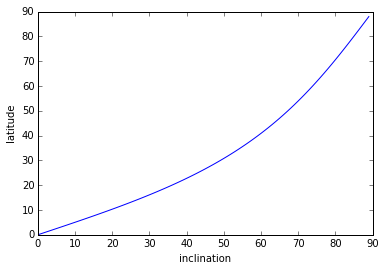

In [3]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

## Angle between directions

In [4]:
direction1 = [150,-40]
direction2 = [120,60]

pmag.angle(direction1,direction2)

array([ 103.00072744])

## Generate and plot Fisher distributed unit vectors from a specified distribution

In [5]:
fisher_directions = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30)
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,191.630059,25.513011,1
1,200.241273,38.867223,1
2,195.161674,32.916670,1
3,205.337462,22.136243,1
4,200.060181,15.319390,1


In [6]:
mean = ipmag.fisher_mean(directions.dec,directions.inc)
ipmag.print_direction_mean(mean)

Dec: 199.4  Inc: 29.7
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 3.0
Precision parameter (k) estimate: 46.2


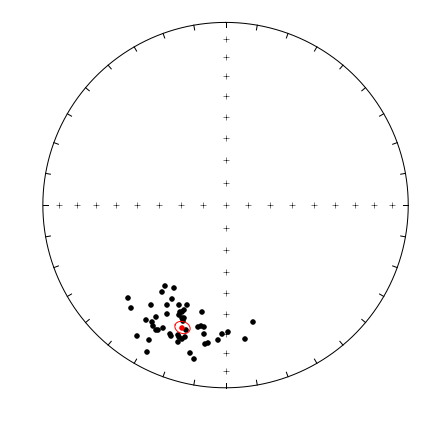

In [7]:
declinations, inclinations = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30, DIBlock=False)

plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(declinations,inclinations)
ipmag.plot_di_mean(mean['dec'],mean['inc'],mean['alpha95'],color='r')

## Flip polarity of paleomagnetic data

Let's resolve the antipodes of the Fisher-distributed directions we just created using the function flip() function.

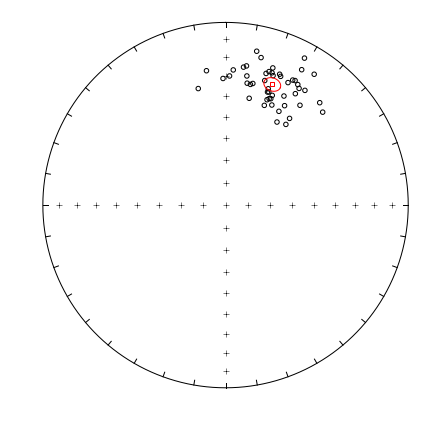

In [8]:
# get reversed directions
reverse = ipmag.flip(ipmag.make_di_block(declinations,inclinations))
rev_directions = pd.DataFrame(reverse,columns=['dec','inc','length'])

# take the Fisher mean of these reversed directions
rev_mean = ipmag.fisher_mean(rev_directions.dec,rev_directions.inc)

# plot the directions in opposite polarity
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(rev_directions.dec, rev_directions.inc)
ipmag.plot_di_mean(rev_mean['dec'],rev_mean['inc'],rev_mean['alpha95'],color='r',marker='s')

## Working with anisotropy data

In [9]:
aniso_data = pd.read_csv('./PmagPy_Datafiles/ani_depthplot/rmag_anisotropy.txt',delimiter='\t',skiprows=1)
aniso_data.head()

,anisotropy_n,anisotropy_s1,anisotropy_s2,anisotropy_s3,anisotropy_s4,anisotropy_s5,anisotropy_s6,anisotropy_sigma,anisotropy_tilt_correction,anisotropy_type,anisotropy_unit,er_analyst_mail_names,er_citation_names,er_location_name,er_sample_name,er_site_name,er_specimen_name,magic_method_codes
0,192,0.332294,0.332862,0.334844,-0.000048,0.000027,-0.000263,0.000122,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,LP-X:AE-H:LP-AN-MS:SO-V
1,192,0.333086,0.332999,0.333916,-0.000262,-0.000322,0.000440,0.000259,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,LP-X:AE-H:LP-AN-MS:SO-V
2,192,0.333750,0.332208,0.334041,-0.000699,0.000663,0.002888,0.000093,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,LP-X:AE-H:LP-AN-MS:SO-V
3,192,0.330565,0.333928,0.335507,0.000603,0.000212,-0.000932,0.000198,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,LP-X:AE-H:LP-AN-MS:SO-V
4,192,0.332747,0.332939,0.334314,-0.001516,-0.000311,-0.000099,0.000162,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,LP-X:AE-H:LP-AN-MS:SO-V


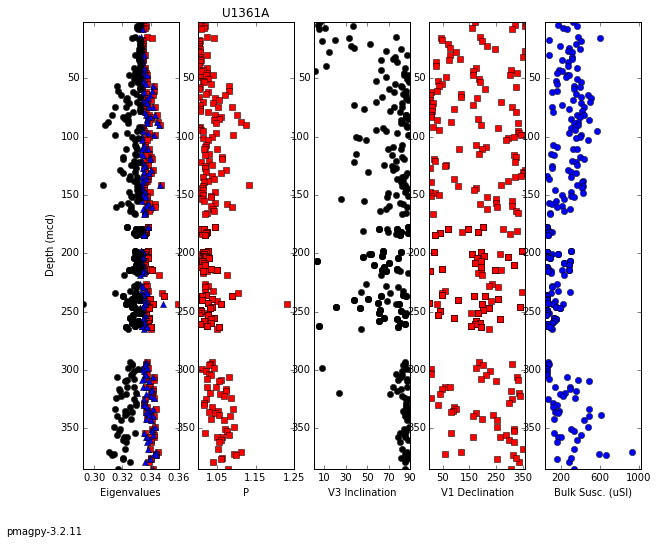

In [10]:
ipmag.aniso_depthplot(dir_path='./PmagPy_Datafiles/ani_depthplot/');

## Working with apparent polar wander paths

PmagPy features an apparent polar wander path (APWP) database for individual plates that goes back to 200 million years. A variety of plotting functions within PmagPy, together with the Basemap package of matplotlib, provide a great way to work with these paleomagnetic poles.

In [44]:
#THE FOLLOWING SHOULD PROBABLY BE INTEGRATED INTO THE GET_PLATE_DATA FUNCTION SO THAT OUTPUT IS EASIER TO WORK WITH

NA_poles_readin = pmag.get_plate_data('NA')
# take care of some formatting -- pole list is output as a string
NA_poles = NA_poles_readin.split('\n')[1:-1]
#create empty Data Frame
NA_poles_list = pd.DataFrame(columns=['age','Plat','Plong'])

NA_poles_new = []
for pole in NA_poles:
    pole_values = pole.split()
    NA_poles_list.ix[pole_values[0]] = pd.Series({'age':float(pole_values[0]),
                                                  'Plat':float(pole_values[1]),
                                                  'Plong':float(pole_values[2])})
    NA_poles_new.append(pole_values)
NA_poles_list.reset_index(inplace=True,drop='index')
NA_poles_list

,age,Plat,Plong
0,0,90.00,0.00
1,1,88.33,180.70
2,2,86.67,180.70
3,3,86.14,175.33
4,4,85.95,173.39
5,5,85.79,171.94
6,6,85.62,170.59
7,7,85.45,169.35
8,8,85.28,168.19
9,9,85.11,167.12


In [45]:
NA_poles_list.dtypes

age      float64
Plat     float64
Plong    float64
dtype: object

TypeError: Not implemented for this type

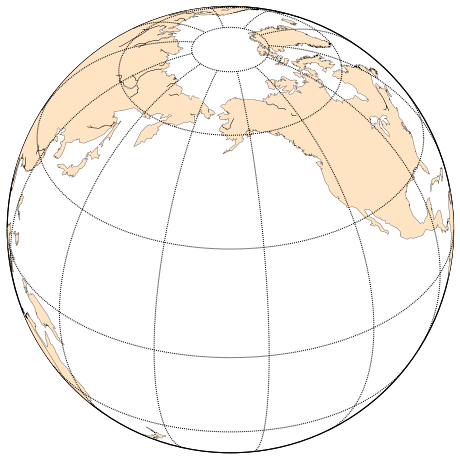

In [63]:
# DO NOT UNDERSTAND WHY THIS IS NOT WORKING

from mpl_toolkits.basemap import Basemap

m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
plt.figure(figsize=(8, 8))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

age = 0
for n in NA_poles_new:
    pmap = ipmag.plot_pole_colorbar(m, float(n[2]),float(n[1]),10.0,-age,-200,0)
   

m.colorbar(pmap,location='bottom',pad="5%",label='Age of magnetization (Ma)')
plt.legend()
#plt.savefig('Code_output/site_VGP_with_Laurentia_Pole_Compilation_colorbar.pdf')
plt.show()